<a href="https://colab.research.google.com/github/YoshB/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a notebook to test different clustering algorithms

# Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering
from sklearn.cluster import AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.mixture import  GaussianMixture


# Functions

In [5]:
def Graph(x, y, n, title):

  y = y.ravel()

  plt.figure(); plt.grid()
  plt.xlabel("X1"); plt.ylabel("X2")
  plt.title(title)

  for i in range(n):
    plt.plot(x[y==i,0], x[y==i,1], 'o')

  plt.plot(x[y==-1,0], x[y==-1,1], 'rx')
  plt.show()

  return

def Evaluate_Model(model,title, x, y):
  print("")
  print(title)
  model.fit(x)
  try:
    y_pred = model.predict(x)
  except:
    print("There´s no 'predict' function available for this model")
    y_pred = model.labels_

  try:
    n = np.max(model.labels_) +1
  except:
    n = model.n_components + 1
  score = adjusted_rand_score(y.ravel(), y_pred)

  print("#Grups: ", n)
  print(title, "SCORE:  ", score)

  Graph(x,y_pred,n, title)

  return model


# Main code


KMeans
#Grups:  3
KMeans SCORE:   0.9414810834351153


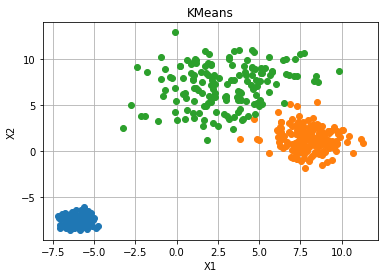


Affinity propagation
#Grups:  7
Affinity propagation SCORE:   0.6347477438229427


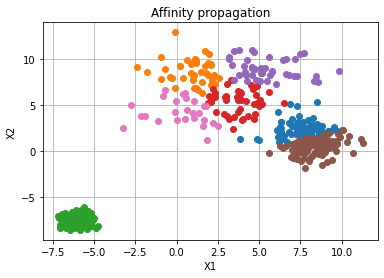


MeanShift
#Grups:  3
MeanShift SCORE:   0.9471643303847477


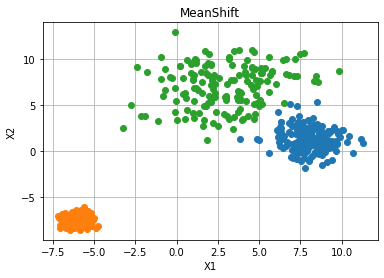


Spectral clustering
There´s no 'predict' function available for this model
#Grups:  3
Spectral clustering SCORE:   0.9414810834351153


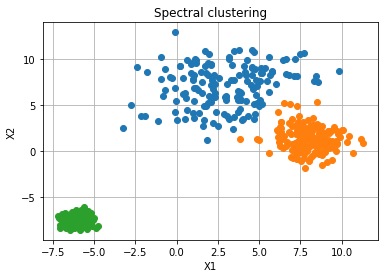


Agglomerative Clustering
There´s no 'predict' function available for this model
#Grups:  3
Agglomerative Clustering SCORE:   0.9761468003968594


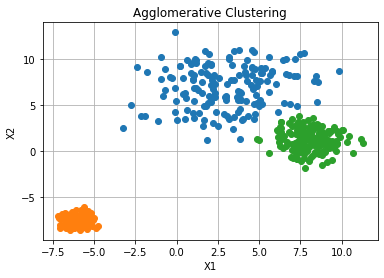


DBSCAN
There´s no 'predict' function available for this model
#Grups:  8
DBSCAN SCORE:   0.34151893534924815


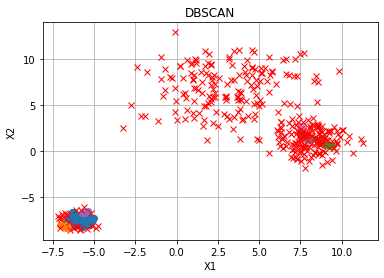


OPTICS
There´s no 'predict' function available for this model
#Grups:  3
OPTICS SCORE:   0.7062242672654966


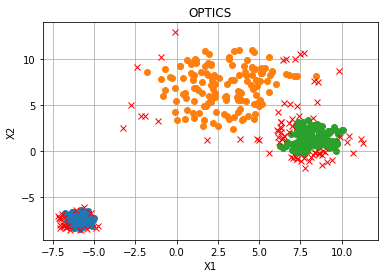


Gaussian Mixture
#Grups:  4
Gaussian Mixture SCORE:   0.9761468003968594


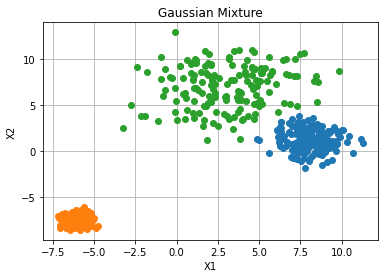


Birch
#Grups:  3
Birch SCORE:   0.8660102803252233


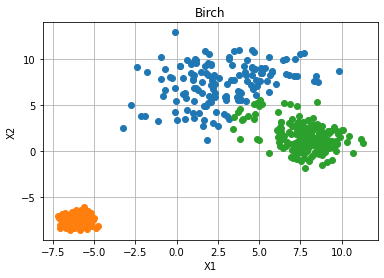

In [11]:
# Choose the dataset

# data = "df_agrupacion_1.cvs"
# data = "df_agrupacion_2.cvs"
# data = "df_agrupacion_3.cvs"
# data = "df_agrupacion_4.cvs"
# data = "df_agrupacion_5.cvs"
 data = "df_agrupacion_6.cvs"

df = pd.read_csv(data)

x = np.asanyarray(df.drop(columns=['y']))
y = np.asanyarray(df[['y']])

n = int(np.max(y)) +1

#some algorithms fail with n = 0
if n==0:
  n=1

# KMEANS
kmeans_model = KMeans(n_clusters = n)
kmeans_model = Evaluate_Model(kmeans_model,"KMeans", x, y)

# AFFINITY PROPAGATION
af_prop_model = AffinityPropagation(damping=0.8, max_iter=500)
af_prop_model = Evaluate_Model(af_prop_model, "Affinity propagation", x, y)

# MEANSHIFT
meanshift_model = MeanShift()
meanshift_model = Evaluate_Model(meanshift_model,"MeanShift", x, y)

# SPECTRAL CLUSTERING
spect_clus_model = SpectralClustering(n_clusters=n)
spect_clus_model = Evaluate_Model(spect_clus_model,'Spectral clustering', x, y)

#AGGLOMERATIVE CLUSTERING
agglo_clus_model = AgglomerativeClustering(n_clusters=n, linkage='ward')
agglo_clus_model = Evaluate_Model(agglo_clus_model, 'Agglomerative Clustering', x, y)

# DBSCAN
DBSCAN_model = DBSCAN(eps=0.2)
DBSCAN_model = Evaluate_Model(DBSCAN_model,'DBSCAN', x, y)

# OPTICS
OPTICS_model = OPTICS(min_cluster_size=0.2)
OPTICS_model = Evaluate_Model(OPTICS_model,'OPTICS', x, y)

# GAUSSIAN MIXTURE
gauss_mix_model = GaussianMixture(n_components=n)
gauss_mix_model = Evaluate_Model(gauss_mix_model, 'Gaussian Mixture', x, y)

# BIRCH
#birch needs at least 2 clusters
if n<2:
  n=2
birch_model = Birch(n_clusters=n)
birch_model = Evaluate_Model(birch_model, 'Birch', x, y)

